# Klon Centaur, part 3
- last update: 1 Jan 2025
- Klon Centaur, part 3: Design Review and Reactive branch analysis
  - review terminations for reactive branches


In [1]:
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Design review {#sec-Design_review}
- intro
  - uniqueness of the circuit - blend of clean and clipped
    - make a block diagram
  - reputation and use by famous musicians 
  - prices for used Klon Centaurs, rarity and clones 
  - musical diodes, special Germanium diodes as a marketing feature
  - use of carbon composit resistors
  - this is a paper analysis only and building and testing of circuit would validate the analysis
- theory of operation
  - operation of bypass circuit
  - purpose of R1
  - purpose of R15 and C11 path
  - analysis of circuit paths
    - clean path 1 seems to contribute minimally
    - function of clean path 2, probably doesn't add to the tonal quality in a way that could be implemented in clean path 2 and could avoid use and expense of dual gang pot
    - signal saturation of U1b
    - use of dual gang P1 - dual gang probably could be eliminated
  - comments about germanium diodes, life time buy and parts screening
- power and grounding
  - purpose of charge pump
  - bypass caps at the Op Amp power pins and +Vb connections
- capacitor and resistor types eg film caps and metal film resistors in the audio path
- manufacturability
  - point to point wiring, extra assembly work
  - chassis
  - hand solding of PCB
  - parts obsolesence eg germanium diodes
  - diode screening
- temperature analysis
- tolerance analysis
  - mix of carbon and metal film resistors, to control RC frequency because metal film is 1% and carbon is 5%

<!--
## Clones, mods & variations

skip ananlysis and make this part of the summary

- Clones, mods & variations
  - changes to component values to move pole/zero frequencies
  - mods for bass guitar and other instruments
  - true bypass with buffered and effects paths
  - other recomendations: 
    - film caps and metal film resistors in the audio path
    - bypass caps at the Op Amp power pins and +Vb connections
  - Essential elements, mixing clean and clipped paths followed by tone control

Clone

- faithful copy, new PCB layout, but with different Op Amps and diodes
  - comment on Op Amps and diodes
- other recomendations: 
  - film caps and metal film resistors in the audio path
  - bypass caps at the Op Amp power pins and +Vb connections
  - new power supply section

Mods  

- scale frequency responce down by 50%, change to a new frequency fn by either multiply all resistor values by fC/fn or multiply all capacitor values by fC/fn.
- change frequency response of clean path

[Did You Know That Klon Made This? (Bass Model Full Demonstration On Electric Guitar And Bass)](https://www.youtube.com/watch?v=Reciyr8sMaY) Didn't really hear any difference
-->

### Variations

- clean path is a BP centered at 100 Hz with upper cut off around 1kHz
- clipped path is a HP with peaking at 1kHz
- different clipping circuit
- new power supply section
- 2nd order filter with independed w and Q adj

There are many pedals inspired by the Klon Centuar, here are a few:

- [Wampler Tumnus Overdrive Pedal](https://www.wamplerpedals.com/products/distortion-overdrive/tumnus-deluxe/): This is a very popular Klon clone that captures the essence of the Klon Centaur in a compact and affordable package. It has a wide range of gain on tap, from a subtle boost to a more overdriven sound. It also has a toggle switch that allows you to select between two different clipping voicings.
- [EarthQuaker Devices Westwood Translucent Overdrive](https://www.earthquakerdevices.com/westwood): This pedal is a bit more of a modern take on the Klon Centaur sound. It has a more aggressive clipping section that can add a bit more bite to your overdrive sound. It also has a three-band EQ that allows you to dial in your tone precisely.
- [J Rockett Rockaway Archer](https://rockettpedals.com/product/rockaway-archer/): This pedal is another well-regarded Klon clone that is known for its versatility. It has a wide range of gain on tap, as well as a toggle switch that allows you to select between two different clipping voicings. It also has a built-in clean boost that can be used to push your amp into overdrive.
- [Tone City Bad Horse Overdrive](https://www.tonecityaudio.com/Products/info.aspx?itemid=45&lcid=16): This is a very affordable Klon clone that is surprisingly good. It captures the essence of the Klon Centaur sound in a compact and affordable package. However, it is not quite as transparent as some of the other pedals on this list.
- [Best Klon clones 2024: Our pick of the best Klon Centaur Klones for every budget](https://www.guitarworld.com/features/best-klon-clones) From straight-up klones to full reimaginings, here are some of the best Klon Centaur-inspired pedals on the market today.
- [Way Huge Smalls Deep State Conspiracy Theory Diodes Overdrive](https://www.jimdunlop.com/way-huge-smalls-deep-state-conspiracy-theory-diodes-overdrive/) The Way Huge Deep State Overdrive is a limited-edition guitar pedal designed to emulate the sound of the Klon Centaur, a highly sought-after overdrive pedal from the mid-1990s. The Deep State utilizes a unique diode that Way Huge's "resident mad scientist" Jeorge Tripps discovered. Tripps' discovery of the diode was accidental and occurred during an experiment where he inserted the diodes into a Conspiracy Theory overdrive. Way Huge describes this diode as having a "truly magical-sounding voltage drop," resulting in "smooth, velvety clipping" that is very responsive to playing dynamics. 


## Analysis of reactive branches {#sec-Analysis_of_reactive_branches}
- sum path 2a
- gain pot set to 50%
- V2 set to zero

### sum path 1
![Schematic of Klon-Centaur_sum_path1_v1](Klon-Centaur_sum_path1_v1.png){#fig-Klon-Centaur_sum_path1_v1_sch}


In [2]:
sum_path1_v1_net_list = '''
* Klon-Centaur_sum_path1_v1.asc
V1 1 0 1
C3 3 1 100e-9
R6 4 3 10e3
C5 4 3 68e-9
R7 3 5 1.5e3
R24 2 5 15e3
C16 5 0 1e-6
Rp1 0 4 50e3
V2 2 0 0
'''

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(sum_path1_v1_net_list)

Build the network equations

In [4]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{3} s v_{1} - C_{3} s v_{3} + I_{V1}$<br>$0 = I_{V2} + \frac{v_{2}}{R_{24}} - \frac{v_{5}}{R_{24}}$<br>$0 = - C_{3} s v_{1} + v_{3} \left(C_{3} s + C_{5} s + \frac{1}{R_{7}} + \frac{1}{R_{6}}\right) + v_{4} \left(- C_{5} s - \frac{1}{R_{6}}\right) - \frac{v_{5}}{R_{7}}$<br>$0 = v_{3} \left(- C_{5} s - \frac{1}{R_{6}}\right) + v_{4} \left(C_{5} s + \frac{1}{Rp_{1}} + \frac{1}{R_{6}}\right)$<br>$0 = v_{5} \left(C_{16} s + \frac{1}{R_{7}} + \frac{1}{R_{24}}\right) - \frac{v_{3}}{R_{7}} - \frac{v_{2}}{R_{24}}$<br>$V_{1} = v_{1}$<br>$V_{2} = v_{2}$<br>

Turn the free symbols into SymPy variables.

In [5]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [6]:
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations can be solved symbolically. 

In [7]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [8]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = V_{2}$<br>$v_{3} = \frac{C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} Rp_{1} V_{1} s^{3} + C_{16} C_{3} R_{24} R_{6} R_{7} V_{1} s^{2} + C_{16} C_{3} R_{24} R_{7} Rp_{1} V_{1} s^{2} + C_{3} C_{5} R_{24} R_{6} Rp_{1} V_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} V_{1} s^{2} + C_{3} R_{24} R_{6} V_{1} s + C_{3} R_{24} Rp_{1} V_{1} s + C_{3} R_{6} R_{7} V_{1} s + C_{3} R_{7} Rp_{1} V_{1} s + C_{5} R_{6} Rp_{1} V_{2} s + R_{6} V_{2} + Rp_{1} V_{2}}{C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} Rp_{1} s^{3} + C_{16} C_{3} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{3} R_{24} R_{7} Rp_{1} s^{2} + C_{16} C_{5} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{16} R_{24} R_{6} s + C_{16} R_{24} R_{7} s + C_{16} R_{24} Rp_{1} s + C_{3} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} s^{2} + C_{3} R_{24} R_{6} s + C_{3} R_{24} Rp_{1} s + C_{3} R_{6} R_{7} s + C_{3} R_{7} Rp_{1} s + C_{5} R_{24} R_{6} s + C_{5} R_{6} R_{7} s + C_{5} R_{6} Rp_{1} s + R_{24} + R_{6} + R_{7} + Rp_{1}}$<br>$v_{4} = \frac{C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} Rp_{1} V_{1} s^{3} + C_{16} C_{3} R_{24} R_{7} Rp_{1} V_{1} s^{2} + C_{3} C_{5} R_{24} R_{6} Rp_{1} V_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} V_{1} s^{2} + C_{3} R_{24} Rp_{1} V_{1} s + C_{3} R_{7} Rp_{1} V_{1} s + C_{5} R_{6} Rp_{1} V_{2} s + Rp_{1} V_{2}}{C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} Rp_{1} s^{3} + C_{16} C_{3} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{3} R_{24} R_{7} Rp_{1} s^{2} + C_{16} C_{5} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{16} R_{24} R_{6} s + C_{16} R_{24} R_{7} s + C_{16} R_{24} Rp_{1} s + C_{3} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} s^{2} + C_{3} R_{24} R_{6} s + C_{3} R_{24} Rp_{1} s + C_{3} R_{6} R_{7} s + C_{3} R_{7} Rp_{1} s + C_{5} R_{24} R_{6} s + C_{5} R_{6} R_{7} s + C_{5} R_{6} Rp_{1} s + R_{24} + R_{6} + R_{7} + Rp_{1}}$<br>$v_{5} = \frac{C_{3} C_{5} R_{24} R_{6} Rp_{1} V_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} V_{2} s^{2} + C_{3} R_{24} R_{6} V_{1} s + C_{3} R_{24} Rp_{1} V_{1} s + C_{3} R_{6} R_{7} V_{2} s + C_{3} R_{7} Rp_{1} V_{2} s + C_{5} R_{6} R_{7} V_{2} s + C_{5} R_{6} Rp_{1} V_{2} s + R_{6} V_{2} + R_{7} V_{2} + Rp_{1} V_{2}}{C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} Rp_{1} s^{3} + C_{16} C_{3} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{3} R_{24} R_{7} Rp_{1} s^{2} + C_{16} C_{5} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{16} R_{24} R_{6} s + C_{16} R_{24} R_{7} s + C_{16} R_{24} Rp_{1} s + C_{3} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} s^{2} + C_{3} R_{24} R_{6} s + C_{3} R_{24} Rp_{1} s + C_{3} R_{6} R_{7} s + C_{3} R_{7} Rp_{1} s + C_{5} R_{24} R_{6} s + C_{5} R_{6} R_{7} s + C_{5} R_{6} Rp_{1} s + R_{24} + R_{6} + R_{7} + Rp_{1}}$<br>$I_{V1} = \frac{- C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} V_{1} s^{3} - C_{16} C_{3} C_{5} R_{24} R_{6} Rp_{1} V_{1} s^{3} - C_{16} C_{3} R_{24} R_{6} V_{1} s^{2} - C_{16} C_{3} R_{24} R_{7} V_{1} s^{2} - C_{16} C_{3} R_{24} Rp_{1} V_{1} s^{2} - C_{3} C_{5} R_{24} R_{6} V_{1} s^{2} - C_{3} C_{5} R_{6} R_{7} V_{1} s^{2} - C_{3} C_{5} R_{6} Rp_{1} V_{1} s^{2} + C_{3} C_{5} R_{6} Rp_{1} V_{2} s^{2} - C_{3} R_{24} V_{1} s - C_{3} R_{6} V_{1} s + C_{3} R_{6} V_{2} s - C_{3} R_{7} V_{1} s - C_{3} Rp_{1} V_{1} s + C_{3} Rp_{1} V_{2} s}{C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} Rp_{1} s^{3} + C_{16} C_{3} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{3} R_{24} R_{7} Rp_{1} s^{2} + C_{16} C_{5} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{16} R_{24} R_{6} s + C_{16} R_{24} R_{7} s + C_{16} R_{24} Rp_{1} s + C_{3} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} s^{2} + C_{3} R_{24} R_{6} s + C_{3} R_{24} Rp_{1} s + C_{3} R_{6} R_{7} s + C_{3} R_{7} Rp_{1} s + C_{5} R_{24} R_{6} s + C_{5} R_{6} R_{7} s + C_{5} R_{6} Rp_{1} s + R_{24} + R_{6} + R_{7} + Rp_{1}}$<br>$I_{V2} = \frac{- C_{16} C_{3} C_{5} R_{6} R_{7} Rp_{1} V_{2} s^{3} - C_{16} C_{3} R_{6} R_{7} V_{2} s^{2} - C_{16} C_{3} R_{7} Rp_{1} V_{2} s^{2} - C_{16} C_{5} R_{6} R_{7} V_{2} s^{2} - C_{16} C_{5} R_{6} Rp_{1} V_{2} s^{2} - C_{16} R_{6} V_{2} s - C_{16} R_{7} V_{2} s - C_{16} Rp_{1} V_{2} s + C_{3} C_{5} R_{6} Rp_{1} V_{1} s^{2} - C_{3} C_{5} R_{6} Rp_{1} V_{2} s^{2} + C_{3} R_{6} V_{1} s - C_{3} R_{6} V_{2} s + C_{3} Rp_{1} V_{1} s - C_{3} Rp_{1} V_{2} s - C_{5} R_{6} V_{2} s - V_{2}}{C_{16} C_{3} C_{5} R_{24} R_{6} R_{7} Rp_{1} s^{3} + C_{16} C_{3} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{3} R_{24} R_{7} Rp_{1} s^{2} + C_{16} C_{5} R_{24} R_{6} R_{7} s^{2} + C_{16} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{16} R_{24} R_{6} s + C_{16} R_{24} R_{7} s + C_{16} R_{24} Rp_{1} s + C_{3} C_{5} R_{24} R_{6} Rp_{1} s^{2} + C_{3} C_{5} R_{6} R_{7} Rp_{1} s^{2} + C_{3} R_{24} R_{6} s + C_{3} R_{24} Rp_{1} s + C_{3} R_{6} R_{7} s + C_{3} R_{7} Rp_{1} s + C_{5} R_{24} R_{6} s + C_{5} R_{6} R_{7} s + C_{5} R_{6} Rp_{1} s + R_{24} + R_{6} + R_{7} + Rp_{1}}$<br>

### Transfer function

Explanation of operation by looking at the pole and zero locations.

Should this be Z11? Z_sym?

Think about inverting op amp conf with C13 || R20 as R feedback



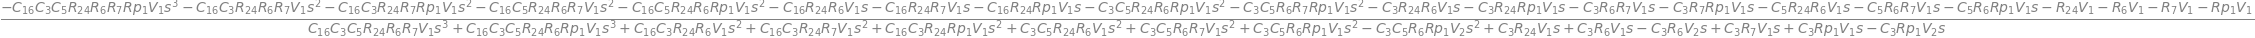

In [9]:
H_sym = cancel(U_sym[v1]/U_sym[I_V1])
H_sym

In [10]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

In [11]:
sym_num

In [12]:
nr = solve(sym_num,s)

In [13]:
len(nr)

In [14]:
N(nr[0].subs(element_values))/(2*np.pi)

In [15]:
nr[0].free_symbols

In [16]:
N(nr[1].subs(element_values))/(2*np.pi)

In [17]:
nr[1].free_symbols

In [18]:
N(nr[2].subs(element_values))/(2*np.pi)

In [19]:
nr[2].free_symbols

In [20]:
sym_denom

In [21]:
dr = solve(sym_denom,s)

In [22]:
len(dr)

In [23]:
N(dr[0].subs(element_values))/(2*np.pi)

In [24]:
dr[0].free_symbols

In [25]:
N(dr[1].subs(element_values))/(2*np.pi)

In [26]:
dr[1].free_symbols

In [27]:
N(dr[2].subs(element_values))/(2*np.pi)

In [28]:
dr[2].free_symbols

## sum path 1a
![Schematic of Klon-Centaur_sum_path1a_v1](Klon-Centaur_sum_path1a_v1.png){#fig-Klon-Centaur_sum_path1a_v1_sch}

In [29]:
sum_path1a_v1_netlist = '''
* Klon-Centaur_sum_path1a_v1.asc
V1 1 0 1 
C3 3 1 100e-9
R6 4 3 10e3
C5 4 3 68e-9
Rp1b1 0 4 50e3
Rp1a1 5 0 50e3
R10 6 5 2e3
R11 7 6 15e3
C7 7 6 82e-9
C8 2 7 390e-12
R12 2 7 422e3
R7 3 8 1.5e3
R24 9 8 15e3
O1b 7 4 2
C16 8 0 1e-6
V2 9 0 0
'''

In [30]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(sum_path1a_v1_netlist)

Build the network equations

In [31]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{3} s v_{1} - C_{3} s v_{3} + I_{V1}$<br>$0 = I_{O1b} + v_{2} \left(C_{8} s + \frac{1}{R_{12}}\right) + v_{7} \left(- C_{8} s - \frac{1}{R_{12}}\right)$<br>$0 = - C_{3} s v_{1} + v_{3} \left(C_{3} s + C_{5} s + \frac{1}{R_{7}} + \frac{1}{R_{6}}\right) + v_{4} \left(- C_{5} s - \frac{1}{R_{6}}\right) - \frac{v_{8}}{R_{7}}$<br>$0 = v_{3} \left(- C_{5} s - \frac{1}{R_{6}}\right) + v_{4} \left(C_{5} s + \frac{1}{Rp1b1} + \frac{1}{R_{6}}\right)$<br>$0 = v_{5} \cdot \left(\frac{1}{Rp1a1} + \frac{1}{R_{10}}\right) - \frac{v_{6}}{R_{10}}$<br>$0 = v_{6} \left(C_{7} s + \frac{1}{R_{11}} + \frac{1}{R_{10}}\right) + v_{7} \left(- C_{7} s - \frac{1}{R_{11}}\right) - \frac{v_{5}}{R_{10}}$<br>$0 = v_{2} \left(- C_{8} s - \frac{1}{R_{12}}\right) + v_{6} \left(- C_{7} s - \frac{1}{R_{11}}\right) + v_{7} \left(C_{7} s + C_{8} s + \frac{1}{R_{12}} + \frac{1}{R_{11}}\right)$<br>$0 = v_{8} \left(C_{16} s + \frac{1}{R_{7}} + \frac{1}{R_{24}}\right) - \frac{v_{3}}{R_{7}} - \frac{v_{9}}{R_{24}}$<br>$0 = I_{V2} - \frac{v_{8}}{R_{24}} + \frac{v_{9}}{R_{24}}$<br>$V_{1} = v_{1}$<br>$V_{2} = v_{9}$<br>$0 = - v_{4} + v_{7}$<br>

Turn the free symbols into SymPy variables.

In [32]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [33]:
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations can be solved symbolically. 

In [34]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

### Transfer function

Explanation of operation by looking at the pole and zero locations.

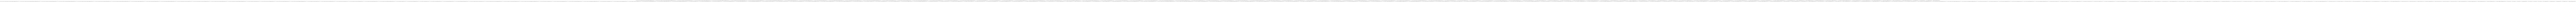

In [35]:
H_sym = cancel(U_sym[v2]/U_sym[v1])
H_sym

In [36]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

In [37]:
sym_num.subs(element_values)

In [38]:
sym_num

In [39]:
nr = solve(sym_num,s)

In [40]:
len(nr)

In [41]:
N(nr[0].subs(element_values))/(2*np.pi)

In [42]:
nr[0].free_symbols

In [43]:
N(nr[1].subs(element_values))/(2*np.pi)

In [44]:
nr[1].free_symbols

In [45]:
N(nr[2].subs(element_values))/(2*np.pi)

In [46]:
nr[2].free_symbols

In [47]:
N(nr[3].subs(element_values))/(2*np.pi)

In [48]:
nr[3].free_symbols

In [49]:
N(nr[4].subs(element_values))/(2*np.pi)

In [50]:
nr[4].free_symbols

In [51]:
sym_denom.subs(element_values)

In [52]:
sym_denom

In [53]:
dr = solve(sym_denom,s)

In [54]:
len(dr)

In [55]:
N(dr[0].subs(element_values))/(2*np.pi)

In [56]:
dr[0].free_symbols

In [57]:
N(dr[1].subs(element_values))/(2*np.pi)

In [58]:
dr[1].free_symbols

In [59]:
N(dr[2].subs(element_values))/(2*np.pi)

In [60]:
dr[2].free_symbols

In [61]:
N(dr[3].subs(element_values))/(2*np.pi)

In [62]:
dr[3].free_symbols

In [63]:
N(dr[4].subs(element_values))/(2*np.pi)

In [64]:
dr[4].free_symbols

## sum path 1b
![Schematic of Klon-Centaur_sum_path1b_v1](Klon-Centaur_sum_path1b_v1.png){#fig-Klon-Centaur_sum_path1b_v1_sch}

Klon-Centaur_sum_path1b_v1

Fix P1 ref designators, seems like Rp1b1 and Rp1a1 parts A and B are mixed

In [65]:
sum_path1b_v1_net_list = '''
* Klon-Centaur_sum_path1b_v1.asc
V1 1 0 1
Rp1b1 0 1 50e3
Rp1a1 3 0 50e3
R10 4 3 2e3
R11 5 4 15e3
C7 5 4 82e-9
C8 2 5 390e-12
R12 2 5 422e3
O1b 5 1 2 
'''

In [66]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(sum_path1b_v1_net_list)

Build the network equations

In [67]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + \frac{v_{1}}{Rp1b1}$<br>$0 = I_{O1b} + v_{2} \left(C_{8} s + \frac{1}{R_{12}}\right) + v_{5} \left(- C_{8} s - \frac{1}{R_{12}}\right)$<br>$0 = v_{3} \cdot \left(\frac{1}{Rp1a1} + \frac{1}{R_{10}}\right) - \frac{v_{4}}{R_{10}}$<br>$0 = v_{4} \left(C_{7} s + \frac{1}{R_{11}} + \frac{1}{R_{10}}\right) + v_{5} \left(- C_{7} s - \frac{1}{R_{11}}\right) - \frac{v_{3}}{R_{10}}$<br>$0 = v_{2} \left(- C_{8} s - \frac{1}{R_{12}}\right) + v_{4} \left(- C_{7} s - \frac{1}{R_{11}}\right) + v_{5} \left(C_{7} s + C_{8} s + \frac{1}{R_{12}} + \frac{1}{R_{11}}\right)$<br>$V_{1} = v_{1}$<br>$0 = - v_{1} + v_{5}$<br>

Turn the free symbols into SymPy variables.

In [68]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [69]:
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations can be solved symbolically. 

In [70]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [71]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{7} C_{8} R_{10} R_{11} R_{12} V_{1} s^{2} + C_{7} C_{8} R_{11} R_{12} Rp1a1 V_{1} s^{2} + C_{7} R_{10} R_{11} V_{1} s + C_{7} R_{11} R_{12} V_{1} s + C_{7} R_{11} Rp1a1 V_{1} s + C_{8} R_{10} R_{12} V_{1} s + C_{8} R_{11} R_{12} V_{1} s + C_{8} R_{12} Rp1a1 V_{1} s + R_{10} V_{1} + R_{11} V_{1} + R_{12} V_{1} + Rp1a1 V_{1}}{C_{7} C_{8} R_{10} R_{11} R_{12} s^{2} + C_{7} C_{8} R_{11} R_{12} Rp1a1 s^{2} + C_{7} R_{10} R_{11} s + C_{7} R_{11} Rp1a1 s + C_{8} R_{10} R_{12} s + C_{8} R_{11} R_{12} s + C_{8} R_{12} Rp1a1 s + R_{10} + R_{11} + Rp1a1}$<br>$v_{3} = \frac{C_{7} R_{11} Rp1a1 V_{1} s + Rp1a1 V_{1}}{C_{7} R_{10} R_{11} s + C_{7} R_{11} Rp1a1 s + R_{10} + R_{11} + Rp1a1}$<br>$v_{4} = \frac{C_{7} R_{10} R_{11} V_{1} s + C_{7} R_{11} Rp1a1 V_{1} s + R_{10} V_{1} + Rp1a1 V_{1}}{C_{7} R_{10} R_{11} s + C_{7} R_{11} Rp1a1 s + R_{10} + R_{11} + Rp1a1}$<br>$v_{5} = V_{1}$<br>$I_{V1} = - \frac{V_{1}}{Rp1b1}$<br>$I_{O1b} = \frac{- C_{7} R_{11} V_{1} s - V_{1}}{C_{7} R_{10} R_{11} s + C_{7} R_{11} Rp1a1 s + R_{10} + R_{11} + Rp1a1}$<br>

### Transfer function

Explanation of operation by looking at the pole and zero locations.

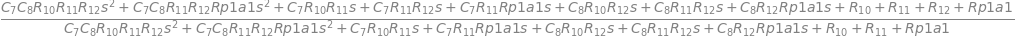

In [72]:
H_sym = cancel(U_sym[v2]/U_sym[v1])
H_sym

find the DC gain

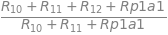

In [73]:
H_sym.subs({s:0})

In [74]:
str(H_sym.subs({s:0}))

'(R10 + R11 + R12 + Rp1a1)/(R10 + R11 + Rp1a1)'

In [75]:
H_sym.subs(element_values).subs({s:0})

High freq gain

In [76]:
H_sym.subs(element_values).subs({s:100e3*2*np.pi})

In [77]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

In [78]:
sym_num.subs(element_values)

In [79]:
sym_num

In [80]:
nr = solve(sym_num,s)

In [81]:
len(nr)

In [82]:
N(nr[0].subs(element_values))/(2*np.pi)

In [83]:
nr[0].free_symbols

In [84]:
N(nr[1].subs(element_values))/(2*np.pi)

In [85]:
nr[1].free_symbols

Try plotting the location of the zeros as a function of P1a

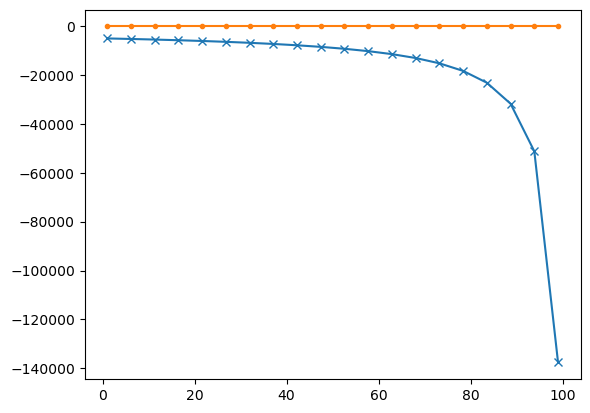

In [86]:
p1_value = 100e3
num_roots = []
for i in np.linspace(1,99,20)/100:
    element_values[Rp1a1] = p1_value - i*p1_value
    element_values[Rp1b1] = i*p1_value
    num_roots.append(solve(sym_num.subs(element_values),s))
    #print(np.array(num_roots)/(2*np.pi))

r1, r2 = zip(*num_roots)
plt.plot(np.linspace(1,99,len(r1)),np.array(r1)/(2*np.pi),'x-')
plt.plot(np.linspace(1,99,len(r2)),np.array(r2)/(2*np.pi),'.-')
plt.show()

In [87]:
sym_denom.subs(element_values)

In [88]:
sym_denom

In [89]:
dr = solve(sym_denom,s)

In [90]:
len(dr)

In [91]:
N(dr[0].subs(element_values))/(2*np.pi)

In [92]:
dr[0].free_symbols

In [93]:
N(dr[1].subs(element_values))/(2*np.pi)

In [94]:
dr[1].free_symbols

Try plotting the location of the poles as a function of P1a

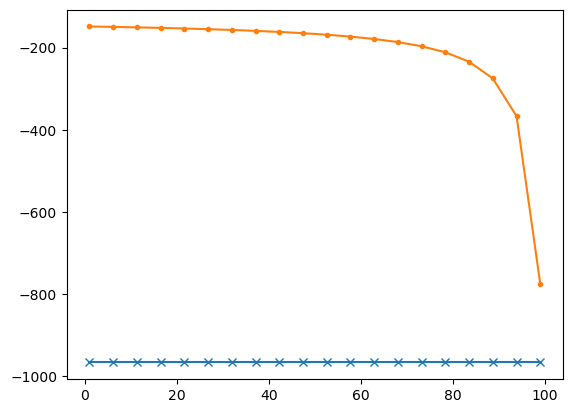

In [95]:
p1_value = 100e3
denom_roots = []
for i in np.linspace(1,99,20)/100:
    element_values[Rp1a1] = p1_value - i*p1_value
    element_values[Rp1b1] = i*p1_value
    denom_roots.append(solve(sym_denom.subs(element_values),s))
    #print(np.array(num_roots)/(2*np.pi))

r1, r2 = zip(*denom_roots)
plt.plot(np.linspace(1,99,len(r1)),np.array(r1)/(2*np.pi),'x-')
plt.plot(np.linspace(1,99,len(r2)),np.array(r2)/(2*np.pi),'.-')
plt.show()

### Numerical solution
Construct a dictionary of element values.

In [96]:
# display the component values
for k,v in element_values.items():
    print('{:s} = {:s}'.format(str(k), str(v)))

V1 = 1.0
Rp1b1 = 99000.0
Rp1a1 = 1000.0
R10 = 2000.0
R11 = 15000.0
C7 = 8.2e-08
C8 = 3.9e-10
R12 = 422000.0
O1b = nan


#### U1b circuit
Gain setting is a percent of full scale

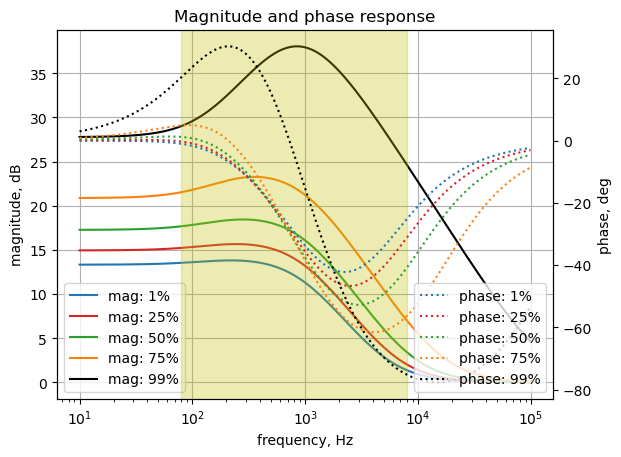

In [97]:
x_axis = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']
gain_setting = np.array([1,25,50,75,99])/100
p1_value = 100e3

tf_num_coef_list = []
tf_denom_coef_list = []

#clean_path1_mag = np.zeros((len(gain_setting),len(x_axis)))

#color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a1] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b1] = gain_setting[i]*p1_value
    
    #element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    #element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    tf_num_coef_list.append(a)
    tf_denom_coef_list.append(b)
    
    #x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg
    #clean_path1_mag[i] = mag
    
    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

## Sum path 2a {#sec-sum_path2a}
![Schematic of Klon-Centaur_sum_path2a_v1](Klon-Centaur_sum_path2a_v1.png){#fig-Klon-Centaur_sum_path2a_v1_sch}
Klon-Centaur_sum_path2a_v1

Try for a symbolic solution again.

Think about P1b2 and P1a2 as just a 100k resistor from node 3 to ground. The center tap supplies signal to next branch.  Analyze v3/v1.  

In [98]:
sum_path2a_v1_net_list = '''
* Klon-Centaur_sum_path2a_v1.asc
R5 1 2 5.1e3
R8 2 0 1.5e3
C4 1 2 68e-9
C6 2 3 390e-9
R9 3 0 1e3
Rp1b2 2 4 50e3
Rp1a2 4 0 50e3
V1 1 0 1
'''

In [99]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(sum_path2a_v1_net_list)

Build the network equations

In [100]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + v_{1} \left(C_{4} s + \frac{1}{R_{5}}\right) + v_{2} \left(- C_{4} s - \frac{1}{R_{5}}\right)$<br>$0 = - C_{6} s v_{3} + v_{1} \left(- C_{4} s - \frac{1}{R_{5}}\right) + v_{2} \left(C_{4} s + C_{6} s + \frac{1}{Rp1b2} + \frac{1}{R_{8}} + \frac{1}{R_{5}}\right) - \frac{v_{4}}{Rp1b2}$<br>$0 = - C_{6} s v_{2} + v_{3} \left(C_{6} s + \frac{1}{R_{9}}\right)$<br>$0 = v_{4} \cdot \left(\frac{1}{Rp1b2} + \frac{1}{Rp1a2}\right) - \frac{v_{2}}{Rp1b2}$<br>$V_{1} = v_{1}$<br>

Turn the free symbols into SymPy variables.

In [101]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [102]:
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations can be solved symbolically. 

In [103]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [104]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{4} C_{6} R_{5} R_{8} R_{9} Rp1a2 V_{1} s^{2} + C_{4} C_{6} R_{5} R_{8} R_{9} Rp1b2 V_{1} s^{2} + C_{4} R_{5} R_{8} Rp1a2 V_{1} s + C_{4} R_{5} R_{8} Rp1b2 V_{1} s + C_{6} R_{8} R_{9} Rp1a2 V_{1} s + C_{6} R_{8} R_{9} Rp1b2 V_{1} s + R_{8} Rp1a2 V_{1} + R_{8} Rp1b2 V_{1}}{C_{4} C_{6} R_{5} R_{8} R_{9} Rp1a2 s^{2} + C_{4} C_{6} R_{5} R_{8} R_{9} Rp1b2 s^{2} + C_{4} R_{5} R_{8} Rp1a2 s + C_{4} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{8} R_{9} s + C_{6} R_{5} R_{8} Rp1a2 s + C_{6} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{9} Rp1a2 s + C_{6} R_{5} R_{9} Rp1b2 s + C_{6} R_{8} R_{9} Rp1a2 s + C_{6} R_{8} R_{9} Rp1b2 s + R_{5} R_{8} + R_{5} Rp1a2 + R_{5} Rp1b2 + R_{8} Rp1a2 + R_{8} Rp1b2}$<br>$v_{3} = \frac{C_{4} C_{6} R_{5} R_{8} R_{9} Rp1a2 V_{1} s^{2} + C_{4} C_{6} R_{5} R_{8} R_{9} Rp1b2 V_{1} s^{2} + C_{6} R_{8} R_{9} Rp1a2 V_{1} s + C_{6} R_{8} R_{9} Rp1b2 V_{1} s}{C_{4} C_{6} R_{5} R_{8} R_{9} Rp1a2 s^{2} + C_{4} C_{6} R_{5} R_{8} R_{9} Rp1b2 s^{2} + C_{4} R_{5} R_{8} Rp1a2 s + C_{4} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{8} R_{9} s + C_{6} R_{5} R_{8} Rp1a2 s + C_{6} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{9} Rp1a2 s + C_{6} R_{5} R_{9} Rp1b2 s + C_{6} R_{8} R_{9} Rp1a2 s + C_{6} R_{8} R_{9} Rp1b2 s + R_{5} R_{8} + R_{5} Rp1a2 + R_{5} Rp1b2 + R_{8} Rp1a2 + R_{8} Rp1b2}$<br>$v_{4} = \frac{C_{4} C_{6} R_{5} R_{8} R_{9} Rp1a2 V_{1} s^{2} + C_{4} R_{5} R_{8} Rp1a2 V_{1} s + C_{6} R_{8} R_{9} Rp1a2 V_{1} s + R_{8} Rp1a2 V_{1}}{C_{4} C_{6} R_{5} R_{8} R_{9} Rp1a2 s^{2} + C_{4} C_{6} R_{5} R_{8} R_{9} Rp1b2 s^{2} + C_{4} R_{5} R_{8} Rp1a2 s + C_{4} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{8} R_{9} s + C_{6} R_{5} R_{8} Rp1a2 s + C_{6} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{9} Rp1a2 s + C_{6} R_{5} R_{9} Rp1b2 s + C_{6} R_{8} R_{9} Rp1a2 s + C_{6} R_{8} R_{9} Rp1b2 s + R_{5} R_{8} + R_{5} Rp1a2 + R_{5} Rp1b2 + R_{8} Rp1a2 + R_{8} Rp1b2}$<br>$I_{V1} = \frac{- C_{4} C_{6} R_{5} R_{8} R_{9} V_{1} s^{2} - C_{4} C_{6} R_{5} R_{8} Rp1a2 V_{1} s^{2} - C_{4} C_{6} R_{5} R_{8} Rp1b2 V_{1} s^{2} - C_{4} C_{6} R_{5} R_{9} Rp1a2 V_{1} s^{2} - C_{4} C_{6} R_{5} R_{9} Rp1b2 V_{1} s^{2} - C_{4} R_{5} R_{8} V_{1} s - C_{4} R_{5} Rp1a2 V_{1} s - C_{4} R_{5} Rp1b2 V_{1} s - C_{6} R_{8} R_{9} V_{1} s - C_{6} R_{8} Rp1a2 V_{1} s - C_{6} R_{8} Rp1b2 V_{1} s - C_{6} R_{9} Rp1a2 V_{1} s - C_{6} R_{9} Rp1b2 V_{1} s - R_{8} V_{1} - Rp1a2 V_{1} - Rp1b2 V_{1}}{C_{4} C_{6} R_{5} R_{8} R_{9} Rp1a2 s^{2} + C_{4} C_{6} R_{5} R_{8} R_{9} Rp1b2 s^{2} + C_{4} R_{5} R_{8} Rp1a2 s + C_{4} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{8} R_{9} s + C_{6} R_{5} R_{8} Rp1a2 s + C_{6} R_{5} R_{8} Rp1b2 s + C_{6} R_{5} R_{9} Rp1a2 s + C_{6} R_{5} R_{9} Rp1b2 s + C_{6} R_{8} R_{9} Rp1a2 s + C_{6} R_{8} R_{9} Rp1b2 s + R_{5} R_{8} + R_{5} Rp1a2 + R_{5} Rp1b2 + R_{8} Rp1a2 + R_{8} Rp1b2}$<br>

### Transfer function

Explanation of operation by looking at the pole and zero locations.

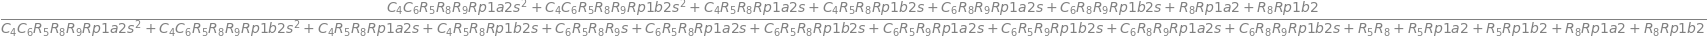

In [105]:
H_sym = cancel(U_sym[v2]/U_sym[v1])
H_sym

In [106]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

In [107]:
sym_num.subs(element_values)

In [108]:
sym_num

In [109]:
nr = solve(sym_num,s)

In [110]:
len(nr)

In [111]:
N(nr[0].subs(element_values))/(2*np.pi)

In [112]:
nr[0].free_symbols

In [113]:
N(nr[1].subs(element_values))/(2*np.pi)

In [114]:
nr[1].free_symbols

Try plotting the location of the zeros as a function of P1a

In [115]:
sym_denom.subs(element_values)

In [116]:
sym_denom

In [117]:
dr = solve(sym_denom,s)

In [118]:
len(dr)

In [119]:
N(dr[0].subs(element_values))/(2*np.pi)

In [120]:
dr[0].free_symbols

In [121]:
N(dr[1].subs(element_values))/(2*np.pi)

In [122]:
dr[1].free_symbols

Try plotting the location of the poles as a function of P1a

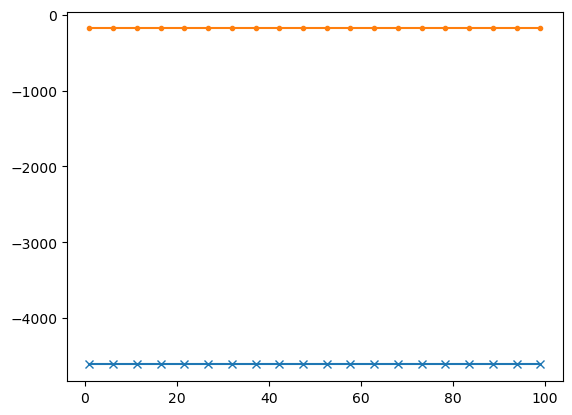

In [123]:
p1_value = 100e3
denom_roots = []
for i in np.linspace(1,99,20)/100:
    element_values[Rp1a2] = p1_value - i*p1_value
    element_values[Rp1b2] = i*p1_value
    denom_roots.append(solve(sym_denom.subs(element_values),s))
    #print(np.array(num_roots)/(2*np.pi))

r1, r2 = zip(*denom_roots)
plt.plot(np.linspace(1,99,len(r1)),np.array(r1)/(2*np.pi),'x-')
plt.plot(np.linspace(1,99,len(r2)),np.array(r2)/(2*np.pi),'.-')
plt.show()

### Numerical solution
Construct a dictionary of element values.

In [124]:
# display the component values
for k,v in element_values.items():
    print('{:s} = {:s}'.format(str(k), str(v)))

V1 = 1.0
R5 = 5100.0
R8 = 1500.0
C4 = 6.8e-08
C6 = 3.9e-07
R9 = 1000.0
Rp1b2 = 99000.0
Rp1a2 = 1000.0


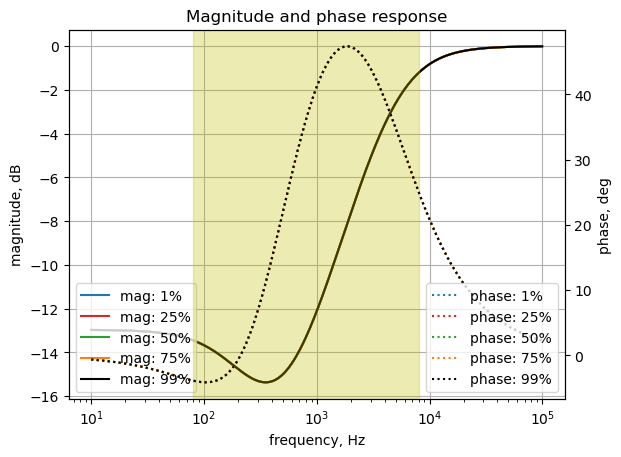

In [125]:
x_axis = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']
gain_setting = np.array([1,25,50,75,99])/100
p1_value = 100e3

tf_num_coef_list = []
tf_denom_coef_list = []

#clean_path1_mag = np.zeros((len(gain_setting),len(x_axis)))

#color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b2] = gain_setting[i]*p1_value
    
    #element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    #element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    tf_num_coef_list.append(a)
    tf_denom_coef_list.append(b)
    
    #x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg
    #clean_path1_mag[i] = mag
    
    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

### Sum path 2b {#sec-sum_path2b}

![Schematic of Klon-Centaur_sum_path2b_v1](Klon-Centaur_sum_path2b_v1.png){#fig-Klon-Centaur_sum_path2b_v1_sch}


In [126]:
sum_path2b_v1_net_list = '''
* Klon-Centaur_sum_path2b_v1.asc
C11 5 3 2.2e-9
R15 3 7 22e3
R17 6 7 27e3
R18 4 7 12e3
C12 6 4 27e-9
R16 6 5 47e3
V1 1 0 1
R1 2 6 392e3
C1 2 6 820e-12
O1 6 0 2
Rp1b2 1 7 50e3
Rp1a2 7 0 50e3
'''

In [127]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(sum_path2b_v1_net_list)

Build the network equations

In [128]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + \frac{v_{1}}{Rp1b2} - \frac{v_{7}}{Rp1b2}$<br>$0 = I_{O1} + v_{2} \left(C_{1} s + \frac{1}{R_{1}}\right) + v_{6} \left(- C_{1} s - \frac{1}{R_{1}}\right)$<br>$0 = - C_{11} s v_{5} + v_{3} \left(C_{11} s + \frac{1}{R_{15}}\right) - \frac{v_{7}}{R_{15}}$<br>$0 = - C_{12} s v_{6} + v_{4} \left(C_{12} s + \frac{1}{R_{18}}\right) - \frac{v_{7}}{R_{18}}$<br>$0 = - C_{11} s v_{3} + v_{5} \left(C_{11} s + \frac{1}{R_{16}}\right) - \frac{v_{6}}{R_{16}}$<br>$0 = - C_{12} s v_{4} + v_{2} \left(- C_{1} s - \frac{1}{R_{1}}\right) + v_{6} \left(C_{1} s + C_{12} s + \frac{1}{R_{17}} + \frac{1}{R_{16}} + \frac{1}{R_{1}}\right) - \frac{v_{7}}{R_{17}} - \frac{v_{5}}{R_{16}}$<br>$0 = v_{7} \cdot \left(\frac{1}{Rp1b2} + \frac{1}{Rp1a2} + \frac{1}{R_{18}} + \frac{1}{R_{17}} + \frac{1}{R_{15}}\right) - \frac{v_{1}}{Rp1b2} - \frac{v_{4}}{R_{18}} - \frac{v_{6}}{R_{17}} - \frac{v_{3}}{R_{15}}$<br>$V_{1} = v_{1}$<br>$0 = v_{6}$<br>

Turn the free symbols into SymPy variables.

In [129]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [130]:
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations can be solved symbolically. 

In [131]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [132]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{- C_{11} C_{12} R_{1} R_{15} R_{17} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{1} R_{15} R_{18} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{1} R_{16} R_{17} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{1} R_{16} R_{18} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{1} R_{17} R_{18} Rp1a2 V_{1} s^{2} - C_{11} R_{1} R_{15} Rp1a2 V_{1} s - C_{11} R_{1} R_{16} Rp1a2 V_{1} s - C_{11} R_{1} R_{17} Rp1a2 V_{1} s - C_{12} R_{1} R_{17} Rp1a2 V_{1} s - C_{12} R_{1} R_{18} Rp1a2 V_{1} s - R_{1} Rp1a2 V_{1}}{C_{1} C_{11} C_{12} R_{1} R_{15} R_{17} R_{18} Rp1a2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{15} R_{17} R_{18} Rp1b2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{15} R_{17} Rp1a2 Rp1b2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{15} R_{18} Rp1a2 Rp1b2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{16} R_{17} R_{18} Rp1b2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{16} R_{17} Rp1a2 Rp1b2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{16} R_{18} Rp1a2 Rp1b2 s^{3} + C_{1} C_{11} C_{12} R_{1} R_{17} R_{18} Rp1a2 Rp1b2 s^{3} + C_{1} C_{11} R_{1} R_{15} R_{17} Rp1a2 s^{2} + C_{1} C_{11} R_{1} R_{15} R_{17} Rp1b2 s^{2} + C_{1} C_{11} R_{1} R_{15} Rp1a2 Rp1b2 s^{2} + C_{1} C_{11} R_{1} R_{16} R_{17} Rp1a2 s^{2} + C_{1} C_{11} R_{1} R_{16} R_{17} Rp1b2 s^{2} + C_{1} C_{11} R_{1} R_{16} Rp1a2 Rp1b2 s^{2} + C_{1} C_{11} R_{1} R_{17} Rp1a2 Rp1b2 s^{2} + C_{1} C_{12} R_{1} R_{17} R_{18} Rp1a2 s^{2} + C_{1} C_{12} R_{1} R_{17} R_{18} Rp1b2 s^{2} + C_{1} C_{12} R_{1} R_{17} Rp1a2 Rp1b2 s^{2} + C_{1} C_{12} R_{1} R_{18} Rp1a2 Rp1b2 s^{2} + C_{1} R_{1} R_{17} Rp1a2 s + C_{1} R_{1} R_{17} Rp1b2 s + C_{1} R_{1} Rp1a2 Rp1b2 s + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} R_{15} R_{17} Rp1a2 s + C_{11} R_{15} R_{17} Rp1b2 s + C_{11} R_{15} Rp1a2 Rp1b2 s + C_{11} R_{16} R_{17} Rp1a2 s + C_{11} R_{16} R_{17} Rp1b2 s + C_{11} R_{16} Rp1a2 Rp1b2 s + C_{11} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{17} R_{18} Rp1a2 s + C_{12} R_{17} R_{18} Rp1b2 s + C_{12} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{18} Rp1a2 Rp1b2 s + R_{17} Rp1a2 + R_{17} Rp1b2 + Rp1a2 Rp1b2}$<br>$v_{3} = \frac{C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 V_{1} s^{2} + C_{11} R_{16} R_{17} Rp1a2 V_{1} s + C_{12} R_{17} R_{18} Rp1a2 V_{1} s + R_{17} Rp1a2 V_{1}}{C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} R_{15} R_{17} Rp1a2 s + C_{11} R_{15} R_{17} Rp1b2 s + C_{11} R_{15} Rp1a2 Rp1b2 s + C_{11} R_{16} R_{17} Rp1a2 s + C_{11} R_{16} R_{17} Rp1b2 s + C_{11} R_{16} Rp1a2 Rp1b2 s + C_{11} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{17} R_{18} Rp1a2 s + C_{12} R_{17} R_{18} Rp1b2 s + C_{12} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{18} Rp1a2 Rp1b2 s + R_{17} Rp1a2 + R_{17} Rp1b2 + Rp1a2 Rp1b2}$<br>$v_{4} = \frac{C_{11} R_{15} R_{17} Rp1a2 V_{1} s + C_{11} R_{16} R_{17} Rp1a2 V_{1} s + R_{17} Rp1a2 V_{1}}{C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} R_{15} R_{17} Rp1a2 s + C_{11} R_{15} R_{17} Rp1b2 s + C_{11} R_{15} Rp1a2 Rp1b2 s + C_{11} R_{16} R_{17} Rp1a2 s + C_{11} R_{16} R_{17} Rp1b2 s + C_{11} R_{16} Rp1a2 Rp1b2 s + C_{11} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{17} R_{18} Rp1a2 s + C_{12} R_{17} R_{18} Rp1b2 s + C_{12} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{18} Rp1a2 Rp1b2 s + R_{17} Rp1a2 + R_{17} Rp1b2 + Rp1a2 Rp1b2}$<br>$v_{5} = \frac{C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 V_{1} s^{2} + C_{11} R_{16} R_{17} Rp1a2 V_{1} s}{C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} R_{15} R_{17} Rp1a2 s + C_{11} R_{15} R_{17} Rp1b2 s + C_{11} R_{15} Rp1a2 Rp1b2 s + C_{11} R_{16} R_{17} Rp1a2 s + C_{11} R_{16} R_{17} Rp1b2 s + C_{11} R_{16} Rp1a2 Rp1b2 s + C_{11} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{17} R_{18} Rp1a2 s + C_{12} R_{17} R_{18} Rp1b2 s + C_{12} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{18} Rp1a2 Rp1b2 s + R_{17} Rp1a2 + R_{17} Rp1b2 + Rp1a2 Rp1b2}$<br>$v_{6} = 0$<br>$v_{7} = \frac{C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 V_{1} s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 V_{1} s^{2} + C_{11} R_{15} R_{17} Rp1a2 V_{1} s + C_{11} R_{16} R_{17} Rp1a2 V_{1} s + C_{12} R_{17} R_{18} Rp1a2 V_{1} s + R_{17} Rp1a2 V_{1}}{C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} R_{15} R_{17} Rp1a2 s + C_{11} R_{15} R_{17} Rp1b2 s + C_{11} R_{15} Rp1a2 Rp1b2 s + C_{11} R_{16} R_{17} Rp1a2 s + C_{11} R_{16} R_{17} Rp1b2 s + C_{11} R_{16} Rp1a2 Rp1b2 s + C_{11} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{17} R_{18} Rp1a2 s + C_{12} R_{17} R_{18} Rp1b2 s + C_{12} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{18} Rp1a2 Rp1b2 s + R_{17} Rp1a2 + R_{17} Rp1b2 + Rp1a2 Rp1b2}$<br>$I_{V1} = \frac{- C_{11} C_{12} R_{15} R_{17} R_{18} V_{1} s^{2} - C_{11} C_{12} R_{15} R_{17} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{15} R_{18} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{16} R_{17} R_{18} V_{1} s^{2} - C_{11} C_{12} R_{16} R_{17} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{16} R_{18} Rp1a2 V_{1} s^{2} - C_{11} C_{12} R_{17} R_{18} Rp1a2 V_{1} s^{2} - C_{11} R_{15} R_{17} V_{1} s - C_{11} R_{15} Rp1a2 V_{1} s - C_{11} R_{16} R_{17} V_{1} s - C_{11} R_{16} Rp1a2 V_{1} s - C_{11} R_{17} Rp1a2 V_{1} s - C_{12} R_{17} R_{18} V_{1} s - C_{12} R_{17} Rp1a2 V_{1} s - C_{12} R_{18} Rp1a2 V_{1} s - R_{17} V_{1} - Rp1a2 V_{1}}{C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} R_{15} R_{17} Rp1a2 s + C_{11} R_{15} R_{17} Rp1b2 s + C_{11} R_{15} Rp1a2 Rp1b2 s + C_{11} R_{16} R_{17} Rp1a2 s + C_{11} R_{16} R_{17} Rp1b2 s + C_{11} R_{16} Rp1a2 Rp1b2 s + C_{11} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{17} R_{18} Rp1a2 s + C_{12} R_{17} R_{18} Rp1b2 s + C_{12} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{18} Rp1a2 Rp1b2 s + R_{17} Rp1a2 + R_{17} Rp1b2 + Rp1a2 Rp1b2}$<br>$I_{O1} = \frac{C_{11} C_{12} R_{15} R_{17} Rp1a2 V_{1} s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 V_{1} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 V_{1} s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 V_{1} s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 V_{1} s^{2} + C_{11} R_{15} Rp1a2 V_{1} s + C_{11} R_{16} Rp1a2 V_{1} s + C_{11} R_{17} Rp1a2 V_{1} s + C_{12} R_{17} Rp1a2 V_{1} s + C_{12} R_{18} Rp1a2 V_{1} s + Rp1a2 V_{1}}{C_{11} C_{12} R_{15} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 Rp1b2 s^{2} + C_{11} R_{15} R_{17} Rp1a2 s + C_{11} R_{15} R_{17} Rp1b2 s + C_{11} R_{15} Rp1a2 Rp1b2 s + C_{11} R_{16} R_{17} Rp1a2 s + C_{11} R_{16} R_{17} Rp1b2 s + C_{11} R_{16} Rp1a2 Rp1b2 s + C_{11} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{17} R_{18} Rp1a2 s + C_{12} R_{17} R_{18} Rp1b2 s + C_{12} R_{17} Rp1a2 Rp1b2 s + C_{12} R_{18} Rp1a2 Rp1b2 s + R_{17} Rp1a2 + R_{17} Rp1b2 + Rp1a2 Rp1b2}$<br>

### Transfer function

Explanation of operation by looking at the pole and zero locations.

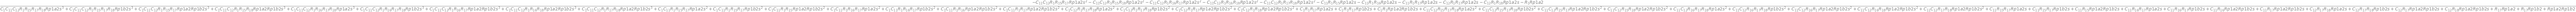

In [133]:
H_sym = cancel(U_sym[v2]/U_sym[v1])
H_sym

In [134]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

In [135]:
sym_num.subs(element_values)

In [136]:
sym_num

In [137]:
nr = solve(sym_num,s)

In [138]:
len(nr)

In [139]:
N(nr[0].subs(element_values))/(2*np.pi)

In [140]:
nr[0].free_symbols

In [141]:
N(nr[1].subs(element_values))/(2*np.pi)

In [142]:
nr[1].free_symbols

Try plotting the location of the zeros as a function of P1a

In [143]:
sym_denom.subs(element_values)

In [144]:
sym_denom

In [145]:
dr = solve(sym_denom,s)

In [146]:
len(dr)

In [147]:
N(dr[0].subs(element_values))/(2*np.pi)

In [148]:
dr[0].free_symbols

In [149]:
N(dr[1].subs(element_values))/(2*np.pi)

In [150]:
dr[1].free_symbols

In [151]:
N(dr[2].subs(element_values))/(2*np.pi)

In [152]:
dr[2].free_symbols

In [153]:
NE = NE_sym.subs(element_values)

Display the equations with component values.

In [154]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} + 2.0 \cdot 10^{-5} v_{1} - 2.0 \cdot 10^{-5} v_{7}$<br>$0 = I_{O1} + v_{2} \cdot \left(8.2 \cdot 10^{-10} s + 2.55102040816327 \cdot 10^{-6}\right) + v_{6} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 2.2 \cdot 10^{-9} s v_{5} + v_{3} \cdot \left(2.2 \cdot 10^{-9} s + 4.54545454545455 \cdot 10^{-5}\right) - 4.54545454545455 \cdot 10^{-5} v_{7}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{6} + v_{4} \cdot \left(2.7 \cdot 10^{-8} s + 8.33333333333333 \cdot 10^{-5}\right) - 8.33333333333333 \cdot 10^{-5} v_{7}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{3} + v_{5} \cdot \left(2.2 \cdot 10^{-9} s + 2.12765957446809 \cdot 10^{-5}\right) - 2.12765957446809 \cdot 10^{-5} v_{6}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{4} + v_{2} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) - 2.12765957446809 \cdot 10^{-5} v_{5} + v_{6} \cdot \left(2.782 \cdot 10^{-8} s + 6.08646531898811 \cdot 10^{-5}\right) - 3.7037037037037 \cdot 10^{-5} v_{7}$<br>$0 = - 2.0 \cdot 10^{-5} v_{1} - 4.54545454545455 \cdot 10^{-5} v_{3} - 8.33333333333333 \cdot 10^{-5} v_{4} - 3.7037037037037 \cdot 10^{-5} v_{6} + 0.000205824915824916 v_{7}$<br>$1.0 = v_{1}$<br>$0 = v_{6}$<br>

Solve for voltages and currents and display the results.

In [155]:
U = solve(NE,X)

In [156]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{- 5.30431515957447 \cdot 10^{50} s^{2} - 3.74430609284333 \cdot 10^{54} s - 2.96179883945842 \cdot 10^{57}}{2.81979927287234 \cdot 10^{46} s^{3} + 3.03640952973888 \cdot 10^{50} s^{2} + 9.24300048355902 \cdot 10^{53} s + 7.85783365570603 \cdot 10^{56}}$<br>$v_{3} = \frac{1.215 \cdot 10^{41} s^{2} + 1.55004835589942 \cdot 10^{45} s + 3.62669245647969 \cdot 10^{48}}{1.55953723404256 \cdot 10^{42} s^{2} + 1.19416505480336 \cdot 10^{46} s + 1.39694820545885 \cdot 10^{49}}$<br>$v_{4} = \frac{5.50531914893617 \cdot 10^{44} s + 3.62669245647969 \cdot 10^{48}}{1.55953723404256 \cdot 10^{42} s^{2} + 1.19416505480336 \cdot 10^{46} s + 1.39694820545885 \cdot 10^{49}}$<br>$v_{5} = \frac{1.215 \cdot 10^{41} s^{2} + 3.75 \cdot 10^{44} s}{1.55953723404256 \cdot 10^{42} s^{2} + 1.19416505480336 \cdot 10^{46} s + 1.39694820545885 \cdot 10^{49}}$<br>$v_{6} = 0.0$<br>$v_{7} = \frac{1.78372340425532 \cdot 10^{41} s^{2} + 1.72558027079304 \cdot 10^{45} s + 3.62669245647969 \cdot 10^{48}}{1.55953723404256 \cdot 10^{42} s^{2} + 1.19416505480336 \cdot 10^{46} s + 1.39694820545885 \cdot 10^{49}}$<br>$I_{V1} = \frac{- 1.38116489361702 \cdot 10^{42} s^{2} - 1.02160702772405 \cdot 10^{46} s - 1.03427895981088 \cdot 10^{49}}{7.79768617021278 \cdot 10^{46} s^{2} + 5.97082527401678 \cdot 10^{50} s + 6.98474102729425 \cdot 10^{53}}$<br>$I_{O1} = \frac{2.16502659574468 \cdot 10^{38} s^{2} + 1.52828820116054 \cdot 10^{42} s + 1.20889748549323 \cdot 10^{45}}{1.4035835106383 \cdot 10^{43} s^{2} + 1.07474854932302 \cdot 10^{47} s + 1.25725338491296 \cdot 10^{50}}$<br>

Plot the frequency response of the transfer function

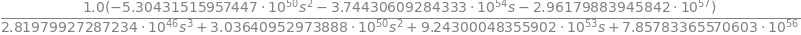

In [157]:
H = U[v2]/U[v1]
H

In [158]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

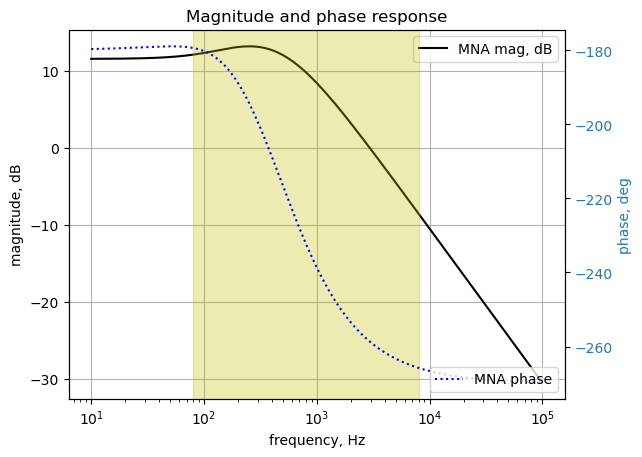

In [159]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-k',label='MNA mag, dB')    # MNA magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()
plt.legend(loc='upper right')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='b',label='MNA phase')  # MNA phase plot
plt.legend(loc='lower right')

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.title('Magnitude and phase response')
plt.show()

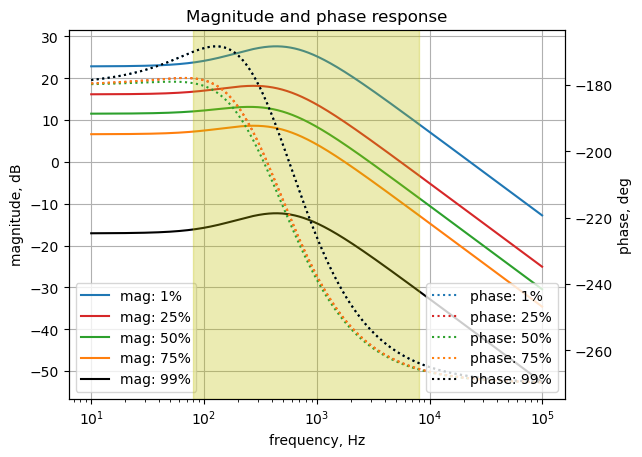

In [160]:
x_axis = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']
gain_setting = np.array([1,25,50,75,99])/100
p1_value = 100e3

tf_num_coef_list = []
tf_denom_coef_list = []

#clean_path1_mag = np.zeros((len(gain_setting),len(x_axis)))

#color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b2] = gain_setting[i]*p1_value
    
    #element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    #element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    tf_num_coef_list.append(a)
    tf_denom_coef_list.append(b)
    
    #x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg
    #clean_path1_mag[i] = mag
    
    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

## Sum path 3 {#sec-sum_path3}

![Schematic of Klon-Centaur_sum_path3_v1](Klon-Centaur_sum_path3_v1.png){#fig-Klon-Centaur_sum_path3_v1_sch}

- comment out diodes and look at path from output of U1b to output of summing amp.  what is the summing amp circuit doing?

In [161]:
sum_path2b_v1_net_list = '''
* Klon-Centaur_sum_path3_v1.asc simplified
Rp1a2 6 0 50e3
R13 4 3 1e3
C11 4 7 2.2e-9
R15 7 6 22e3
R17 5 6 27e3
R18 8 6 12e3
C12 5 8 27e-9
R16 5 4 47e3
R20 2 5 392e3
C13 2 5 820e-12
O2a 5 0 2
C9 1 3 0.5e-6
V3 1 0 1
'''

In [162]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(sum_path2b_v1_net_list)

Build the network equations

In [163]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{9} s v_{1} - C_{9} s v_{3} + I_{V3}$<br>$0 = I_{O2a} + v_{2} \left(C_{13} s + \frac{1}{R_{20}}\right) + v_{5} \left(- C_{13} s - \frac{1}{R_{20}}\right)$<br>$0 = - C_{9} s v_{1} + v_{3} \left(C_{9} s + \frac{1}{R_{13}}\right) - \frac{v_{4}}{R_{13}}$<br>$0 = - C_{11} s v_{7} + v_{4} \left(C_{11} s + \frac{1}{R_{16}} + \frac{1}{R_{13}}\right) - \frac{v_{5}}{R_{16}} - \frac{v_{3}}{R_{13}}$<br>$0 = - C_{12} s v_{8} + v_{2} \left(- C_{13} s - \frac{1}{R_{20}}\right) + v_{5} \left(C_{12} s + C_{13} s + \frac{1}{R_{20}} + \frac{1}{R_{17}} + \frac{1}{R_{16}}\right) - \frac{v_{6}}{R_{17}} - \frac{v_{4}}{R_{16}}$<br>$0 = v_{6} \cdot \left(\frac{1}{Rp1a2} + \frac{1}{R_{18}} + \frac{1}{R_{17}} + \frac{1}{R_{15}}\right) - \frac{v_{8}}{R_{18}} - \frac{v_{5}}{R_{17}} - \frac{v_{7}}{R_{15}}$<br>$0 = - C_{11} s v_{4} + v_{7} \left(C_{11} s + \frac{1}{R_{15}}\right) - \frac{v_{6}}{R_{15}}$<br>$0 = - C_{12} s v_{5} + v_{8} \left(C_{12} s + \frac{1}{R_{18}}\right) - \frac{v_{6}}{R_{18}}$<br>$V_{3} = v_{1}$<br>$0 = v_{5}$<br>

Turn the free symbols into SymPy variables.

In [164]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

In [165]:
element_values = SymMNA.get_part_values(network_df)

### Symbolic solution
The network equations can be solved symbolically. 

In [166]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [167]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{3}$<br>$v_{2} = \frac{- C_{11} C_{12} C_{9} R_{15} R_{17} R_{18} R_{20} V_{3} s^{3} - C_{11} C_{12} C_{9} R_{15} R_{17} R_{20} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{15} R_{18} R_{20} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{16} R_{17} R_{20} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{16} R_{18} R_{20} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{17} R_{18} R_{20} Rp1a2 V_{3} s^{3} - C_{11} C_{9} R_{15} R_{17} R_{20} V_{3} s^{2} - C_{11} C_{9} R_{15} R_{20} Rp1a2 V_{3} s^{2} - C_{11} C_{9} R_{16} R_{20} Rp1a2 V_{3} s^{2} - C_{11} C_{9} R_{17} R_{20} Rp1a2 V_{3} s^{2} - C_{12} C_{9} R_{17} R_{18} R_{20} V_{3} s^{2} - C_{12} C_{9} R_{17} R_{20} Rp1a2 V_{3} s^{2} - C_{12} C_{9} R_{18} R_{20} Rp1a2 V_{3} s^{2} - C_{9} R_{17} R_{20} V_{3} s - C_{9} R_{20} Rp1a2 V_{3} s}{C_{11} C_{12} C_{13} C_{9} R_{13} R_{15} R_{17} R_{18} R_{20} s^{4} + C_{11} C_{12} C_{13} C_{9} R_{13} R_{15} R_{17} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} C_{9} R_{13} R_{15} R_{18} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} C_{9} R_{13} R_{16} R_{17} R_{18} R_{20} s^{4} + C_{11} C_{12} C_{13} C_{9} R_{13} R_{16} R_{17} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} C_{9} R_{13} R_{16} R_{18} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} C_{9} R_{13} R_{17} R_{18} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} C_{9} R_{15} R_{16} R_{17} R_{18} R_{20} s^{4} + C_{11} C_{12} C_{13} C_{9} R_{15} R_{16} R_{17} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} C_{9} R_{15} R_{16} R_{18} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} C_{9} R_{16} R_{17} R_{18} R_{20} Rp1a2 s^{4} + C_{11} C_{12} C_{13} R_{15} R_{17} R_{18} R_{20} s^{3} + C_{11} C_{12} C_{13} R_{15} R_{17} R_{20} Rp1a2 s^{3} + C_{11} C_{12} C_{13} R_{15} R_{18} R_{20} Rp1a2 s^{3} + C_{11} C_{12} C_{13} R_{16} R_{17} R_{18} R_{20} s^{3} + C_{11} C_{12} C_{13} R_{16} R_{17} R_{20} Rp1a2 s^{3} + C_{11} C_{12} C_{13} R_{16} R_{18} R_{20} Rp1a2 s^{3} + C_{11} C_{12} C_{13} R_{17} R_{18} R_{20} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{13} C_{9} R_{13} R_{15} R_{17} R_{20} s^{3} + C_{11} C_{13} C_{9} R_{13} R_{15} R_{20} Rp1a2 s^{3} + C_{11} C_{13} C_{9} R_{13} R_{16} R_{17} R_{20} s^{3} + C_{11} C_{13} C_{9} R_{13} R_{16} R_{20} Rp1a2 s^{3} + C_{11} C_{13} C_{9} R_{13} R_{17} R_{20} Rp1a2 s^{3} + C_{11} C_{13} C_{9} R_{15} R_{16} R_{17} R_{20} s^{3} + C_{11} C_{13} C_{9} R_{15} R_{16} R_{20} Rp1a2 s^{3} + C_{11} C_{13} C_{9} R_{16} R_{17} R_{20} Rp1a2 s^{3} + C_{11} C_{13} R_{15} R_{17} R_{20} s^{2} + C_{11} C_{13} R_{15} R_{20} Rp1a2 s^{2} + C_{11} C_{13} R_{16} R_{17} R_{20} s^{2} + C_{11} C_{13} R_{16} R_{20} Rp1a2 s^{2} + C_{11} C_{13} R_{17} R_{20} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{13} C_{9} R_{13} R_{17} R_{18} R_{20} s^{3} + C_{12} C_{13} C_{9} R_{13} R_{17} R_{20} Rp1a2 s^{3} + C_{12} C_{13} C_{9} R_{13} R_{18} R_{20} Rp1a2 s^{3} + C_{12} C_{13} C_{9} R_{16} R_{17} R_{18} R_{20} s^{3} + C_{12} C_{13} C_{9} R_{16} R_{17} R_{20} Rp1a2 s^{3} + C_{12} C_{13} C_{9} R_{16} R_{18} R_{20} Rp1a2 s^{3} + C_{12} C_{13} R_{17} R_{18} R_{20} s^{2} + C_{12} C_{13} R_{17} R_{20} Rp1a2 s^{2} + C_{12} C_{13} R_{18} R_{20} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{13} C_{9} R_{13} R_{17} R_{20} s^{2} + C_{13} C_{9} R_{13} R_{20} Rp1a2 s^{2} + C_{13} C_{9} R_{16} R_{17} R_{20} s^{2} + C_{13} C_{9} R_{16} R_{20} Rp1a2 s^{2} + C_{13} R_{17} R_{20} s + C_{13} R_{20} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>$v_{3} = \frac{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} V_{3} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} V_{3} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{9} R_{13} R_{15} R_{17} V_{3} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} V_{3} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} V_{3} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{13} R_{17} R_{18} V_{3} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} V_{3} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 V_{3} s^{2} + C_{9} R_{13} R_{17} V_{3} s + C_{9} R_{13} Rp1a2 V_{3} s + C_{9} R_{16} R_{17} V_{3} s + C_{9} R_{16} Rp1a2 V_{3} s}{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>$v_{4} = \frac{C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{9} R_{15} R_{16} R_{17} V_{3} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} V_{3} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 V_{3} s^{2} + C_{9} R_{16} R_{17} V_{3} s + C_{9} R_{16} Rp1a2 V_{3} s}{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>$v_{5} = 0$<br>$v_{6} = \frac{C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{2}}{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>$v_{7} = \frac{C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{9} R_{15} R_{16} R_{17} V_{3} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{2}}{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>$v_{8} = \frac{C_{11} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{2}}{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>$I_{V3} = \frac{- C_{11} C_{12} C_{9} R_{15} R_{17} R_{18} V_{3} s^{3} - C_{11} C_{12} C_{9} R_{15} R_{17} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{15} R_{18} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} V_{3} s^{3} - C_{11} C_{12} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{16} R_{18} Rp1a2 V_{3} s^{3} - C_{11} C_{12} C_{9} R_{17} R_{18} Rp1a2 V_{3} s^{3} - C_{11} C_{9} R_{15} R_{17} V_{3} s^{2} - C_{11} C_{9} R_{15} Rp1a2 V_{3} s^{2} - C_{11} C_{9} R_{16} R_{17} V_{3} s^{2} - C_{11} C_{9} R_{16} Rp1a2 V_{3} s^{2} - C_{11} C_{9} R_{17} Rp1a2 V_{3} s^{2} - C_{12} C_{9} R_{17} R_{18} V_{3} s^{2} - C_{12} C_{9} R_{17} Rp1a2 V_{3} s^{2} - C_{12} C_{9} R_{18} Rp1a2 V_{3} s^{2} - C_{9} R_{17} V_{3} s - C_{9} Rp1a2 V_{3} s}{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>$I_{O2a} = \frac{C_{11} C_{12} C_{9} R_{15} R_{17} R_{18} V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{17} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{16} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{12} C_{9} R_{17} R_{18} Rp1a2 V_{3} s^{3} + C_{11} C_{9} R_{15} R_{17} V_{3} s^{2} + C_{11} C_{9} R_{15} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{16} Rp1a2 V_{3} s^{2} + C_{11} C_{9} R_{17} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{17} R_{18} V_{3} s^{2} + C_{12} C_{9} R_{17} Rp1a2 V_{3} s^{2} + C_{12} C_{9} R_{18} Rp1a2 V_{3} s^{2} + C_{9} R_{17} V_{3} s + C_{9} Rp1a2 V_{3} s}{C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{15} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{13} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} R_{18} s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{17} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{15} R_{16} R_{18} Rp1a2 s^{3} + C_{11} C_{12} C_{9} R_{16} R_{17} R_{18} Rp1a2 s^{3} + C_{11} C_{12} R_{15} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{15} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{15} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{17} R_{18} s^{2} + C_{11} C_{12} R_{16} R_{17} Rp1a2 s^{2} + C_{11} C_{12} R_{16} R_{18} Rp1a2 s^{2} + C_{11} C_{12} R_{17} R_{18} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{15} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{15} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{13} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{11} C_{9} R_{15} R_{16} R_{17} s^{2} + C_{11} C_{9} R_{15} R_{16} Rp1a2 s^{2} + C_{11} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{11} R_{15} R_{17} s + C_{11} R_{15} Rp1a2 s + C_{11} R_{16} R_{17} s + C_{11} R_{16} Rp1a2 s + C_{11} R_{17} Rp1a2 s + C_{12} C_{9} R_{13} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{13} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{13} R_{18} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{17} R_{18} s^{2} + C_{12} C_{9} R_{16} R_{17} Rp1a2 s^{2} + C_{12} C_{9} R_{16} R_{18} Rp1a2 s^{2} + C_{12} R_{17} R_{18} s + C_{12} R_{17} Rp1a2 s + C_{12} R_{18} Rp1a2 s + C_{9} R_{13} R_{17} s + C_{9} R_{13} Rp1a2 s + C_{9} R_{16} R_{17} s + C_{9} R_{16} Rp1a2 s + R_{17} + Rp1a2}$<br>

### Transfer function

Explanation of operation by looking at the pole and zero locations.

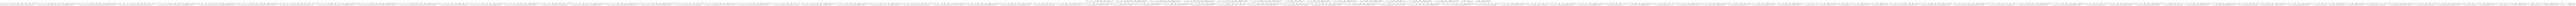

In [168]:
H_sym = cancel(U_sym[v2]/U_sym[v1])
H_sym

In [169]:
sym_num, sym_denom = fraction(H_sym) #returns numerator and denominator

In [170]:
sym_num.subs(element_values)

In [171]:
sym_num

In [172]:
nr = solve(sym_num,s)

In [173]:
len(nr)

In [174]:
N(nr[0].subs(element_values))/(2*np.pi)

In [175]:
nr[0].free_symbols

In [176]:
N(nr[1].subs(element_values))/(2*np.pi)

In [177]:
nr[1].free_symbols

In [178]:
N(nr[2].subs(element_values))/(2*np.pi)

In [179]:
nr[2].free_symbols

Try plotting the location of the zeros as a function of P1a

In [180]:
sym_denom.subs(element_values)

In [181]:
sym_denom

In [182]:
dr = solve(sym_denom,s)

In [183]:
len(dr)

In [184]:
N(dr[0].subs(element_values))/(2*np.pi)

In [185]:
dr[0].free_symbols

In [186]:
N(dr[1].subs(element_values))/(2*np.pi)

In [187]:
dr[1].free_symbols

In [188]:
N(dr[2].subs(element_values))/(2*np.pi)

In [189]:
dr[2].free_symbols

In [190]:
N(dr[3].subs(element_values))/(2*np.pi)

In [191]:
dr[3].free_symbols

In [192]:
NE = NE_sym.subs(element_values)

Display the equations with component values.

In [193]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V3} + 5.0 \cdot 10^{-7} s v_{1} - 5.0 \cdot 10^{-7} s v_{3}$<br>$0 = I_{O2a} + v_{2} \cdot \left(8.2 \cdot 10^{-10} s + 2.55102040816327 \cdot 10^{-6}\right) + v_{5} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right)$<br>$0 = - 5.0 \cdot 10^{-7} s v_{1} + v_{3} \cdot \left(5.0 \cdot 10^{-7} s + 0.001\right) - 0.001 v_{4}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{7} - 0.001 v_{3} + v_{4} \cdot \left(2.2 \cdot 10^{-9} s + 0.00102127659574468\right) - 2.12765957446809 \cdot 10^{-5} v_{5}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{8} + v_{2} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) - 2.12765957446809 \cdot 10^{-5} v_{4} + v_{5} \cdot \left(2.782 \cdot 10^{-8} s + 6.08646531898812 \cdot 10^{-5}\right) - 3.7037037037037 \cdot 10^{-5} v_{6}$<br>$0 = - 3.7037037037037 \cdot 10^{-5} v_{5} + 0.000185824915824916 v_{6} - 4.54545454545455 \cdot 10^{-5} v_{7} - 8.33333333333333 \cdot 10^{-5} v_{8}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{4} - 4.54545454545455 \cdot 10^{-5} v_{6} + v_{7} \cdot \left(2.2 \cdot 10^{-9} s + 4.54545454545455 \cdot 10^{-5}\right)$<br>$0 = - 2.7 \cdot 10^{-8} s v_{5} - 8.33333333333333 \cdot 10^{-5} v_{6} + v_{8} \cdot \left(2.7 \cdot 10^{-8} s + 8.33333333333333 \cdot 10^{-5}\right)$<br>$1.0 = v_{1}$<br>$0 = v_{5}$<br>

Solve for voltages and currents and display the results.

In [194]:
U = solve(NE,X)

In [195]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{- 6.94390272606383 \cdot 10^{49} s^{3} - 5.42488999032883 \cdot 10^{53} s^{2} - 5.70146276595748 \cdot 10^{56} s}{1.18505879485372 \cdot 10^{45} s^{4} + 2.37055412773066 \cdot 10^{49} s^{3} + 8.56431089029255 \cdot 10^{52} s^{2} + 7.3622139446325 \cdot 10^{55} s + 2.90890957446798 \cdot 10^{57}}$<br>$v_{3} = \frac{6.55416622340426 \cdot 10^{40} s^{3} + 1.10026871104664 \cdot 10^{45} s^{2} + 1.24113475177305 \cdot 10^{48} s}{6.55416622340426 \cdot 10^{40} s^{3} + 1.10717453551472 \cdot 10^{45} s^{2} + 1.29221510315925 \cdot 10^{48} s + 5.17139479905418 \cdot 10^{49}}$<br>$v_{4} = \frac{6.20887500000001 \cdot 10^{40} s^{3} + 1.07472853535354 \cdot 10^{45} s^{2} + 1.21527777777778 \cdot 10^{48} s}{6.55416622340426 \cdot 10^{40} s^{3} + 1.10717453551472 \cdot 10^{45} s^{2} + 1.29221510315925 \cdot 10^{48} s + 5.17139479905418 \cdot 10^{49}}$<br>$v_{5} = 0.0$<br>$v_{6} = \frac{1.51875 \cdot 10^{40} s^{3} + 4.68749999999999 \cdot 10^{43} s^{2}}{6.55416622340426 \cdot 10^{40} s^{3} + 1.10717453551472 \cdot 10^{45} s^{2} + 1.29221510315925 \cdot 10^{48} s + 5.17139479905418 \cdot 10^{49}}$<br>$v_{7} = \frac{6.20887500000001 \cdot 10^{40} s^{3} + 1.05694444444445 \cdot 10^{44} s^{2}}{6.55416622340426 \cdot 10^{40} s^{3} + 1.10717453551472 \cdot 10^{45} s^{2} + 1.29221510315925 \cdot 10^{48} s + 5.17139479905418 \cdot 10^{49}}$<br>$v_{8} = \frac{4.68749999999999 \cdot 10^{43} s^{2}}{6.55416622340426 \cdot 10^{40} s^{3} + 1.10717453551472 \cdot 10^{45} s^{2} + 1.29221510315925 \cdot 10^{48} s + 5.17139479905418 \cdot 10^{49}}$<br>$I_{V3} = \frac{- 3.4529122340425 \cdot 10^{39} s^{3} - 2.55401756931003 \cdot 10^{43} s^{2} - 2.58569739952709 \cdot 10^{46} s}{6.55416622340426 \cdot 10^{43} s^{3} + 1.10717453551472 \cdot 10^{48} s^{2} + 1.29221510315925 \cdot 10^{51} s + 5.17139479905418 \cdot 10^{52}}$<br>$I_{O2a} = \frac{1.13369840425532 \cdot 10^{43} s^{3} + 8.85696324951646 \cdot 10^{46} s^{2} + 9.30851063829792 \cdot 10^{49} s}{2.35949984042553 \cdot 10^{47} s^{3} + 3.985828327853 \cdot 10^{51} s^{2} + 4.65197437137331 \cdot 10^{54} s + 1.86170212765951 \cdot 10^{56}}$<br>

Plot the frequency response of the transfer function

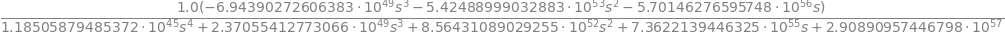

In [196]:
H = U[v2]/U[v1]
H

In [197]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

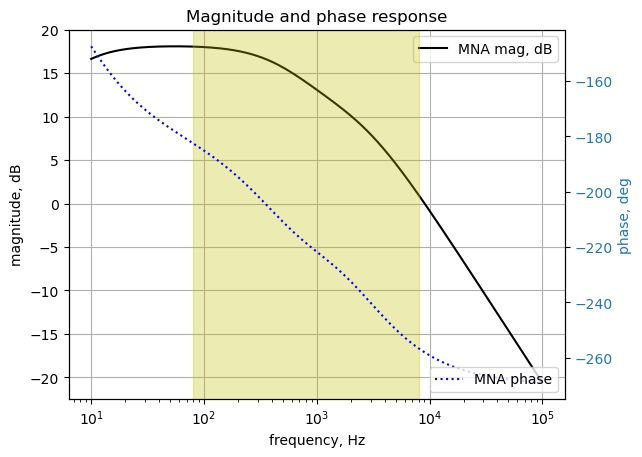

In [198]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-k',label='MNA mag, dB')    # MNA magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()
plt.legend(loc='upper right')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='b',label='MNA phase')  # MNA phase plot
plt.legend(loc='lower right')

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.title('Magnitude and phase response')
plt.show()

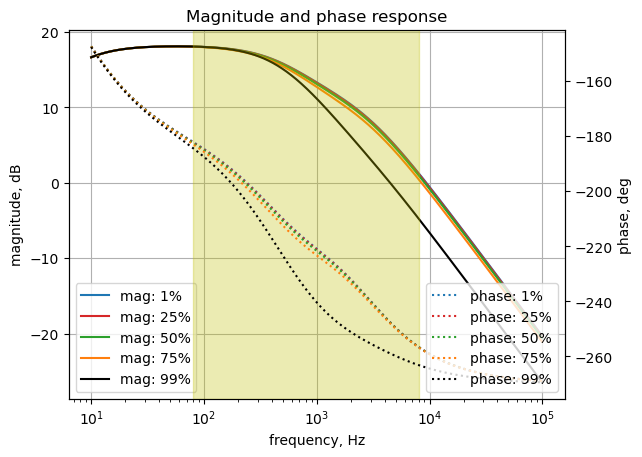

In [199]:
x_axis = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']
gain_setting = np.array([1,25,50,75,99])/100
p1_value = 100e3

tf_num_coef_list = []
tf_denom_coef_list = []

#clean_path1_mag = np.zeros((len(gain_setting),len(x_axis)))

#color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i in range(len(gain_setting)):
    element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    element_values[Rp1b2] = gain_setting[i]*p1_value
    
    #element_values[Rp1a2] = p1_value - gain_setting[i]*p1_value
    #element_values[Rp1b2] = gain_setting[i]*p1_value
    
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
    tf_num_coef_list.append(a)
    tf_denom_coef_list.append(b)
    
    #x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
    w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg
    #clean_path1_mag[i] = mag
    
    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='mag: {:.0f}%'.format(gain_setting[i]*100))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase: {:.0f}%'.format(gain_setting[i]*100))  # phase plot

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3) 

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

In [200]:
C4 = 68e-9
R5 = 5e3
1/(2*np.pi*C4*R5)

In [201]:
C5 = 68e-9
R6 = 10e3
1/(2*np.pi*C5*R6)

In [202]:
C6 = 390e-9
R8 = 1.5e3
1/(2*np.pi*C6*R8)

In [203]:
C6 = 390e-9
R9 = 1e3
1/(2*np.pi*C6*R9)

In [204]:
C6 = 390e-9
R9 = 1e3
1/(2*np.pi*C6*(R9+R8))

In [205]:
C6 = 390e-9
Pgain_1 = 100e3
1/(2*np.pi*C4*Pgain_1)

In [206]:
C13 = 820e-12
R20 = 392e3
1/(2*np.pi*C13*R20)

In [207]:
C12 = 27e-9
R18 = 12e3
1/(2*np.pi*C12*R18)

In [208]:
C12 = 27e-9
R17 = 27e3
1/(2*np.pi*C12*R17)

In [209]:
1/(2*np.pi*C12*(R17+R18))

In [210]:
C11 = 2.2e-9
R15 = 22e3
1/(2*np.pi*C11*R15)

## Summary for part 3


## Summary and conclusion for Klon Centaur analysis

The Klon Centaur is famous for its:

* **Exceptional Tone:** It's renowned for its incredibly transparent and musical overdrive. It's known for adding warmth, dimension, and a touch of sparkle to your guitar tone without significantly altering your core sound. 
* **Versatility:** While primarily an overdrive, it can also be used as a clean boost to increase signal strength and add subtle drive. 
* **Rarity and High Demand:** Production of the original Centaur was limited, and demand far exceeded supply. This scarcity has driven prices into the stratosphere on the used market. 
* **Cult Following:** The pedal has developed a cult following among professional guitarists and audiophiles. Its reputation for sonic excellence has been solidified by word-of-mouth and endorsements from top players.

Essentially, the Klon Centaur is revered for its ability to enhance your guitar's natural voice in a subtle yet impactful way, making it a highly sought-after and legendary piece of gear.
